### Import some libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

## Import Data From NBA Dataset
#### Field Gold Attempts in season 2024-25 by Stephen Curry in Golden State Warriors

In [2]:
from nba_api.stats.endpoints import shotchartdetail

response = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=201939,  # Stephen Curry's Player ID
    season_nullable="2024-25",
    context_measure_simple="FGA"  # Field Goal Attempts
)
data = response.get_data_frames()[0]

#### Draw Basketball court On Background (Help from ChatGPT)

In [3]:
def draw_court(ax=None, color='black', lw=1, outer_lines=True):
    # If no axis is provided, create one
    if ax is None:
        ax = plt.gca()

    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], color=color, linewidth=lw)
    ax.plot([220, 220], [0, 140], color=color, linewidth=lw)
    # 3PT Arc
    arc = patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, color=color, linewidth=lw)
    ax.add_patch(arc)
    # Paint area
    ax.plot([-80, -80], [0, 190], color=color, linewidth=lw)
    ax.plot([80, 80], [0, 190], color=color, linewidth=lw)
    ax.plot([-60, -60], [0, 190], color=color, linewidth=lw)
    ax.plot([60, 60], [0, 190], color=color, linewidth=lw)
    ax.plot([-80, 80], [190, 190], color=color, linewidth=lw)
    # Free throw circle
    free_throw_circle = patches.Circle((0, 190), 60, color=color, fill=False, linewidth=lw)
    ax.add_patch(free_throw_circle)
    # Restricted area
    restricted_circle = patches.Circle((0, 40), 40, color=color, fill=False, linewidth=lw)
    ax.add_patch(restricted_circle)
    # Backboard
    ax.plot([-30, 30], [0, 0], color=color, linewidth=lw)
    # Rim
    rim = patches.Circle((0, 40), 7.5, color=color, fill=False, linewidth=lw)
    ax.add_patch(rim)
    # Outer lines
    if outer_lines:
        ax.plot([-250, -250], [-47.5, 422.5], color=color, linewidth=lw)
        ax.plot([250, 250], [-47.5, 422.5], color=color, linewidth=lw)
        ax.plot([-250, 250], [422.5, 422.5], color=color, linewidth=lw)
        ax.plot([-250, 250], [-47.5, -47.5], color=color, linewidth=lw)
    return ax


#### Draw Hexbin plot for Field Gold Attempts in season 2023-24 From Stephen Curry in Golden State Warriors

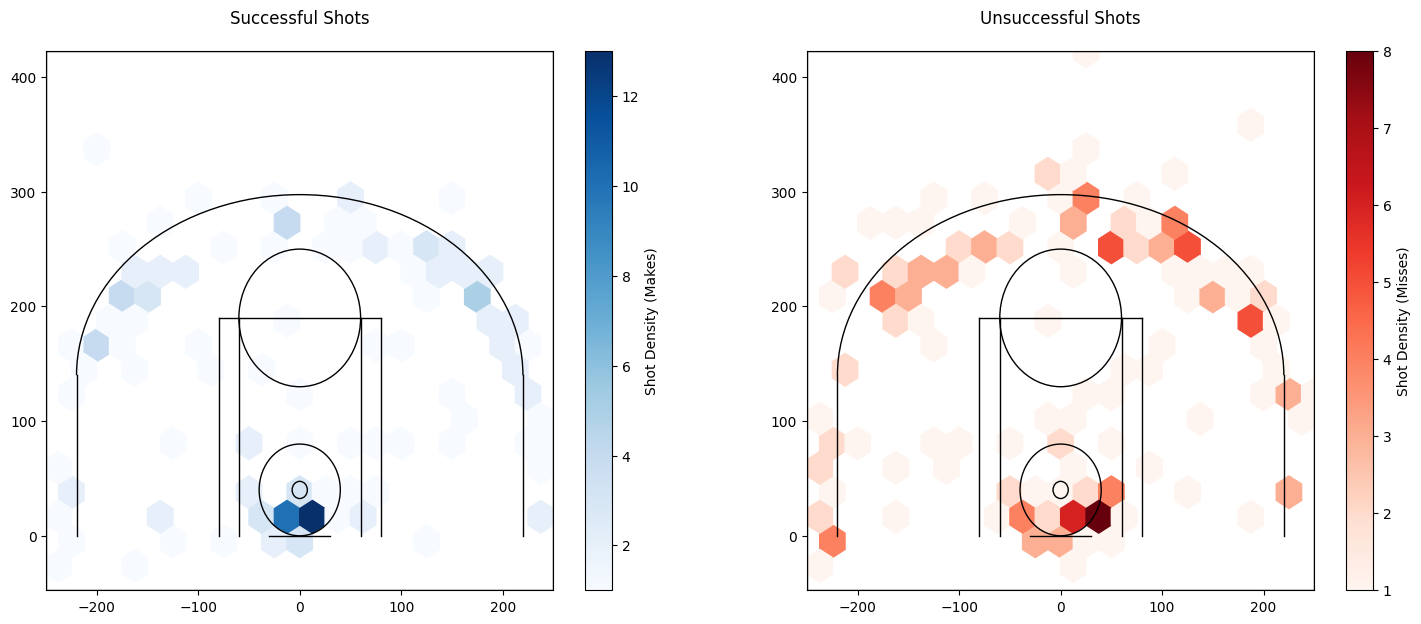

In [4]:
successful_shots   = data[data['SHOT_MADE_FLAG'] == 1]
unsuccessful_shots = data[data['SHOT_MADE_FLAG'] == 0]

fig, (Plot1, Plot2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot for successful shots
P1 = Plot1.hexbin(successful_shots['LOC_X'], successful_shots['LOC_Y'], gridsize=20, cmap='Blues', extent=(-250, 250, -47.5, 422.5), mincnt=1)

draw_court(Plot1, color='black', lw=1)
Plot1.set_xlim(-250, 250)
Plot1.set_ylim(-47.5, 422.5)
Plot1.set_title('Successful Shots', fontsize=12, pad=20)

# Plot for unsuccessful shots
P2 = Plot2.hexbin(unsuccessful_shots['LOC_X'], unsuccessful_shots['LOC_Y'], gridsize=20, cmap='Reds', extent=(-250, 250, -47.5, 422.5), mincnt=1)

draw_court(Plot2, color='black', lw=1)
Plot2.set_xlim(-250, 250)
Plot2.set_ylim(-47.5, 422.5)
Plot2.set_title('Unsuccessful Shots', fontsize=12, pad=20)

# Add colorbars
C1 = fig.colorbar(P1, ax=Plot1, orientation='vertical')
C1.set_label('Shot Density (Makes)')

C2 = fig.colorbar(P2, ax=Plot2, orientation='vertical')
C2.set_label('Shot Density (Misses)')

plt.show()


#### Shot Density Distribution: Successful vs Unsuccessful Field Goals

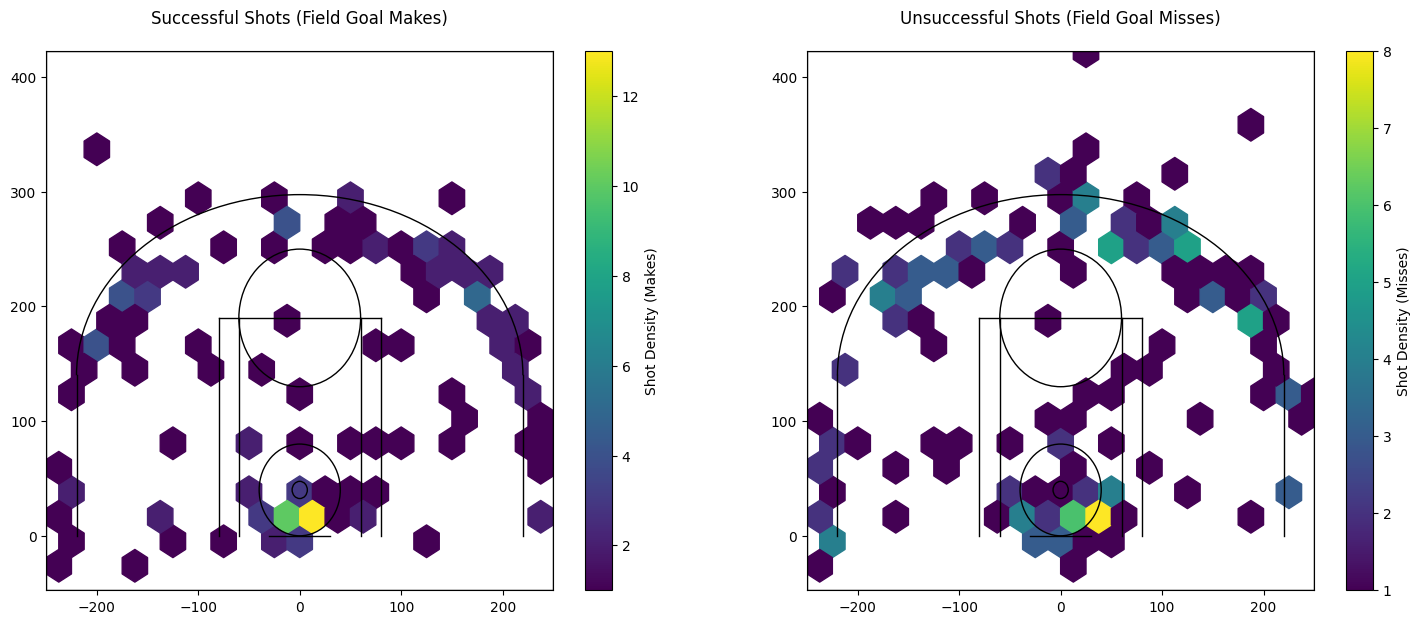

In [5]:
fig, (Plot1, Plot2) = plt.subplots(1, 2, figsize=(18, 7))

# Plot for successful shots
P1 = Plot1.hexbin(successful_shots['LOC_X'], successful_shots['LOC_Y'], gridsize=20, cmap='viridis', extent=(-250, 250, -47.5, 422.5), mincnt=1)

draw_court(Plot1, color='black', lw=1)
Plot1.set_xlim(-250, 250)
Plot1.set_ylim(-47.5, 422.5)
Plot1.set_title('Successful Shots (Field Goal Makes)', fontsize=12, pad=20)

# Plot for unsuccessful shots
P2 = Plot2.hexbin(unsuccessful_shots['LOC_X'], unsuccessful_shots['LOC_Y'], gridsize=20, cmap='viridis', extent=(-250, 250, -47.5, 422.5), mincnt=1)

draw_court(Plot2, color='black', lw=1)
Plot2.set_xlim(-250, 250)
Plot2.set_ylim(-47.5, 422.5)
Plot2.set_title('Unsuccessful Shots (Field Goal Misses)', fontsize=12, pad=20)

# Add colorbars
C1 = fig.colorbar(P1, ax=Plot1, orientation='vertical')
C1.set_label('Shot Density (Makes)')

C2 = fig.colorbar(P2, ax=Plot2, orientation='vertical')
C2.set_label('Shot Density (Misses)')

plt.show()


#### Hexagonal Binning of Successful and Unsuccessful Shots with Marginal Distributions

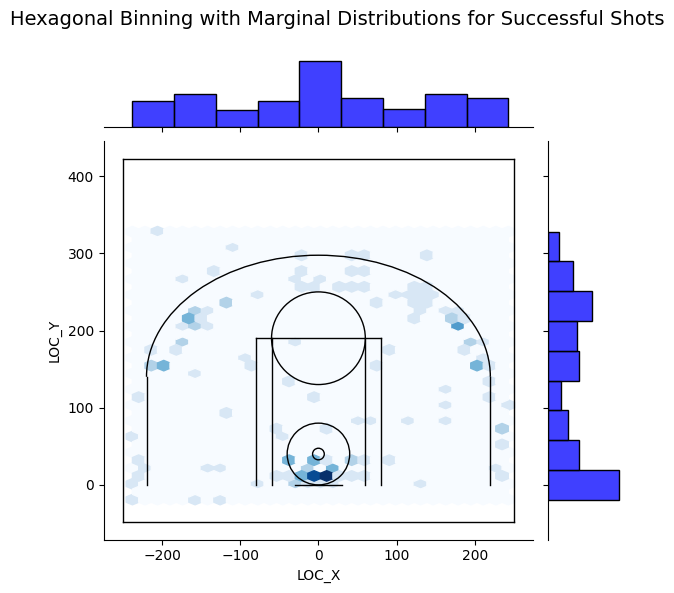

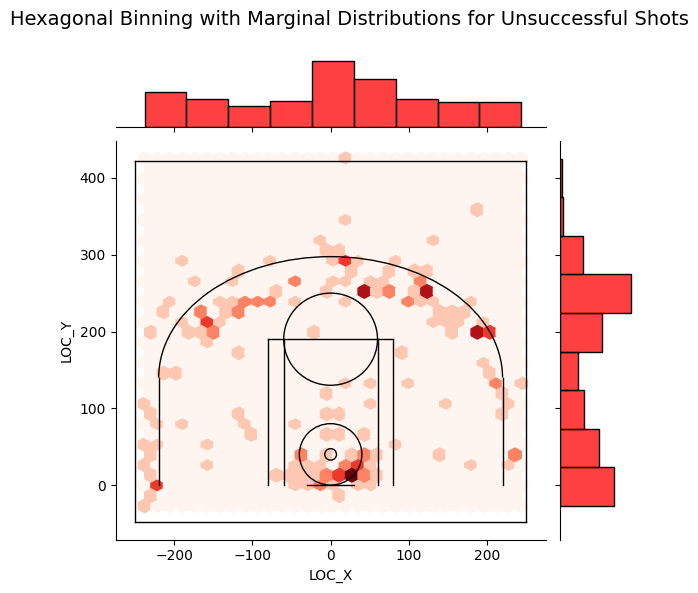

In [6]:
# Plot for Successful shots
sns.jointplot(
        x=successful_shots['LOC_X'],
        y=successful_shots['LOC_Y'],
        kind="hex",  
        gridsize=30,
        cmap="Blues",  
        bins=20,  
        color="blue",  
    )
draw_court(color='black', lw=1)
plt.subplots_adjust(top=0.9)
plt.suptitle("Hexagonal Binning with Marginal Distributions for Successful Shots", fontsize=14)

# Plot for unsuccessful shots
sns.jointplot(
        x=unsuccessful_shots['LOC_X'],
        y=unsuccessful_shots['LOC_Y'],
        kind="hex",
        gridsize=30,
        cmap="Reds",
        bins=20,
        color="red",
    )
draw_court(color='black', lw=1)
plt.subplots_adjust(top=0.9)
plt.suptitle("Hexagonal Binning with Marginal Distributions for Unsuccessful Shots", fontsize=14)

# Display the plots
plt.show()

#### Density Contour Plot of Successful and Unsuccessful Shot Attempts

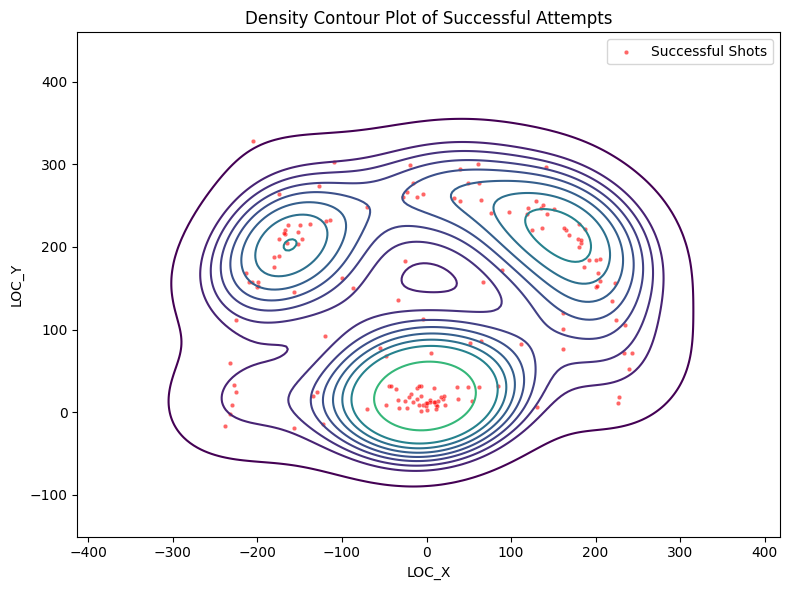

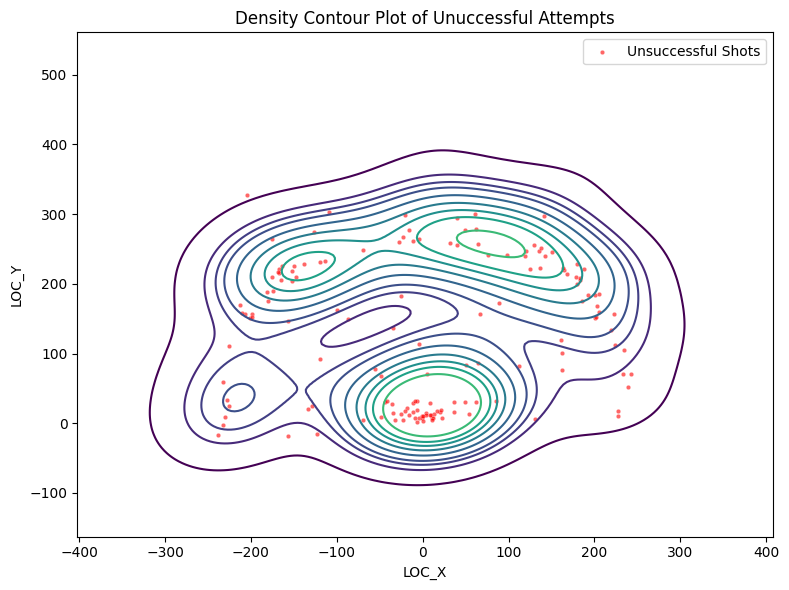

In [7]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=successful_shots['LOC_X'],
    y=successful_shots['LOC_Y'],
    levels=10,  # Number of contour levels
    cmap="viridis",  # Colormap
    fill=False  # Contours only, no filled areas
)

# Add scatter plot
sns.scatterplot(x=successful_shots['LOC_X'],y=successful_shots['LOC_Y'], color="red", s=10, label="Successful Shots", alpha=0.6)
plt.xlabel("LOC_X")
plt.ylabel("LOC_Y")
plt.title("Density Contour Plot of Successful Attempts")
plt.legend()
plt.tight_layout()



plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=unsuccessful_shots['LOC_X'],
    y=unsuccessful_shots['LOC_Y'],
    levels=10,  # Number of contour levels
    cmap="viridis",  # Colormap
    fill=False  # Contours only, no filled areas
)

# Add scatter plot
sns.scatterplot(x=successful_shots['LOC_X'],y=successful_shots['LOC_Y'], color="red", s=10, label="Unsuccessful Shots", alpha=0.6)

# Add labels, legend, and title
plt.xlabel("LOC_X")
plt.ylabel("LOC_Y")
plt.title("Density Contour Plot of Unuccessful Attempts")
plt.legend()
plt.tight_layout()

plt.show()


#### Density Contour Plot of Successful and Unsuccessful Shot Attempts

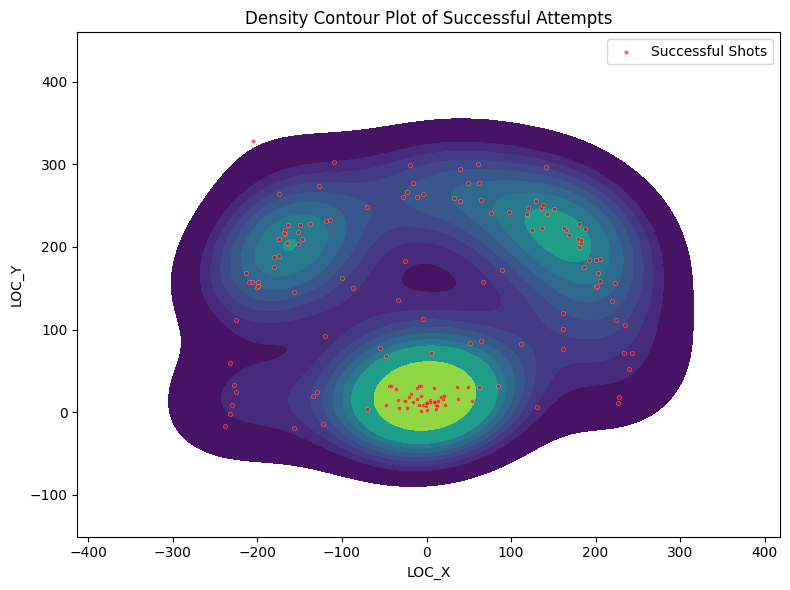

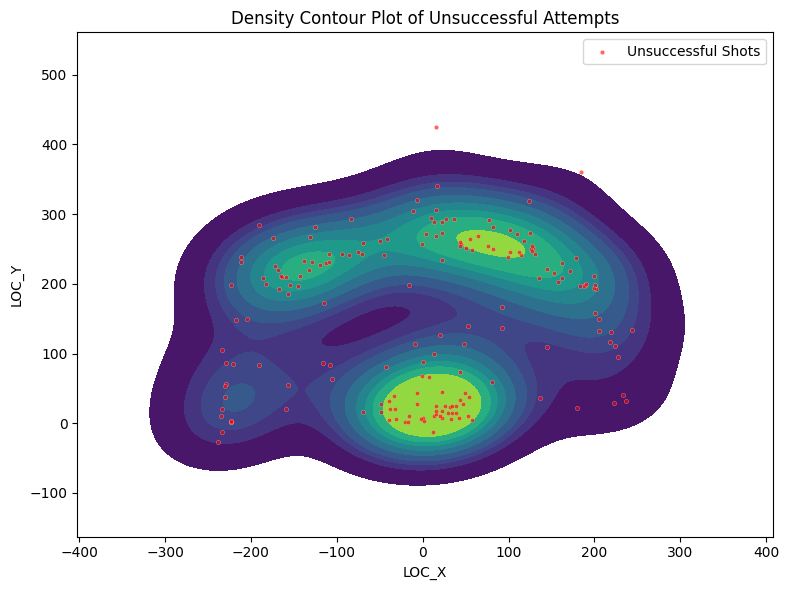

In [8]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=successful_shots['LOC_X'],
    y=successful_shots['LOC_Y'],
    levels=10,
    cmap="viridis",
    fill=True
)

# Add scatter plot
sns.scatterplot(x=successful_shots['LOC_X'], y=successful_shots['LOC_Y'], color="red", s=10, label="Successful Shots", alpha=0.6)
plt.xlabel("LOC_X")
plt.ylabel("LOC_Y")
plt.title("Density Contour Plot of Successful Attempts")
plt.legend()
plt.tight_layout()



plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=unsuccessful_shots['LOC_X'],
    y=unsuccessful_shots['LOC_Y'],
    levels=10,  # Number of contour levels
    cmap="viridis",  # Colormap
    fill=True  # Contours only, no filled areas
)

# Add scatter plot
sns.scatterplot(x=unsuccessful_shots['LOC_X'], y=unsuccessful_shots['LOC_Y'], color="red", s=10, label="Unsuccessful Shots", alpha=0.6)
plt.xlabel("LOC_X")
plt.ylabel("LOC_Y")
plt.title("Density Contour Plot of Unsuccessful Attempts")
plt.legend()
plt.tight_layout()


# Show plot
plt.show()


#### Contour Plot of Successful and Unsuccessful Shot Attempts

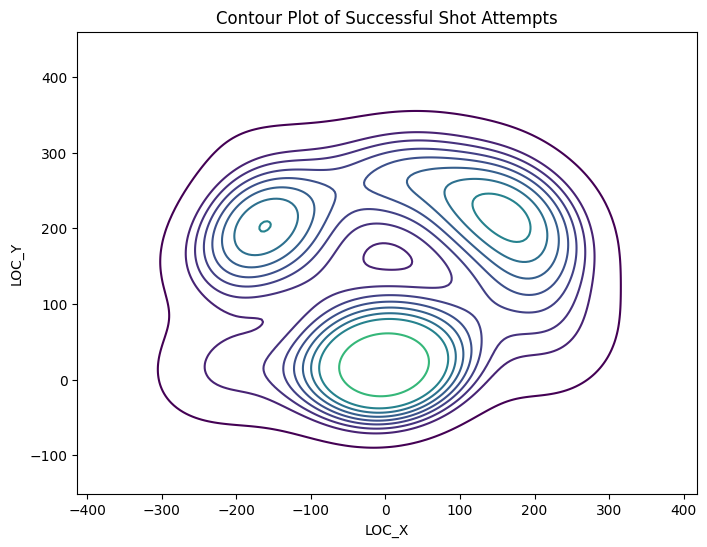

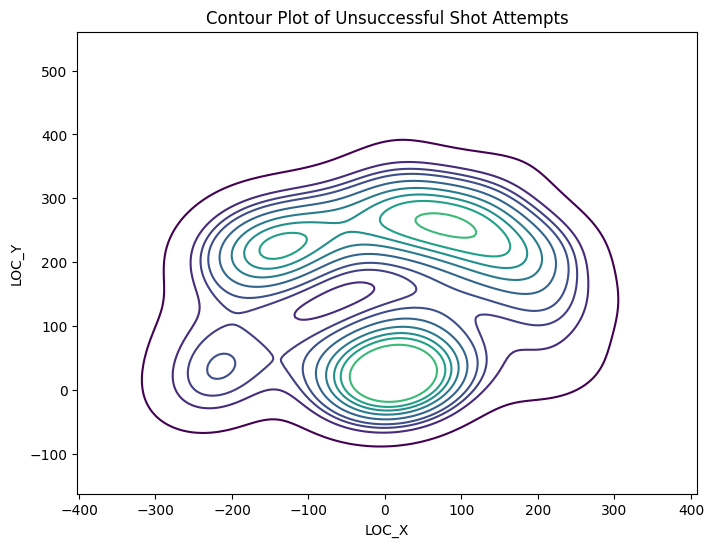

In [9]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=successful_shots['LOC_X'],
    y=successful_shots['LOC_Y'],
    levels=10,
    cmap="viridis",
    fill=False
)
plt.title("Contour Plot of Successful Shot Attempts")


# Create a contour plot using Seaborn
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=unsuccessful_shots['LOC_X'],
    y=unsuccessful_shots['LOC_Y'],
    levels=10,  # Number of contour levels
    cmap="viridis",  # Colormap
    fill=False  # Contours only, no filled areas
)
plt.title("Contour Plot of Unsuccessful Shot Attempts")

# Show plot
plt.show()

#### Loading and Previewing Housing Dataset with Pandas

In [10]:
import numpy as np
import pandas as pd
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


#### Definition of columns

In [11]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

#### Correlation Matrix Heatmap

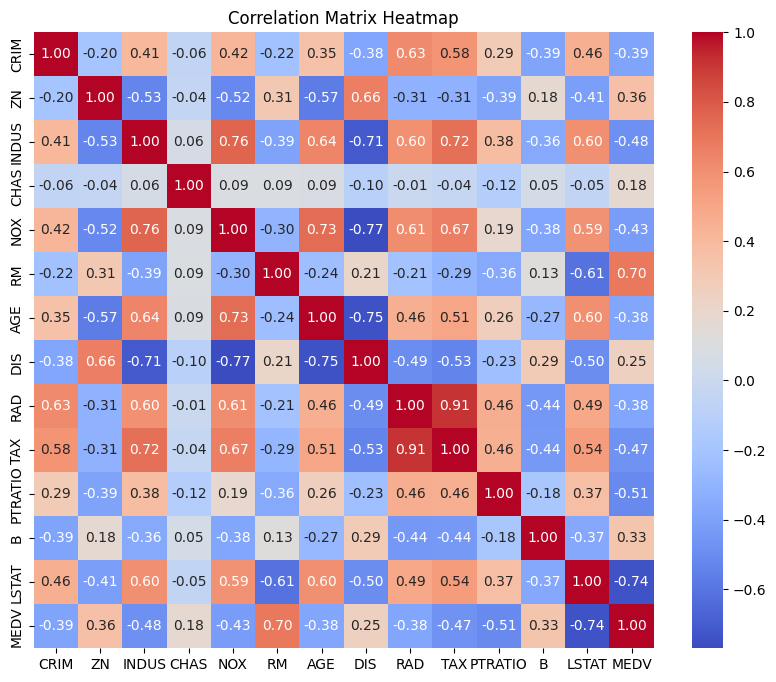

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix
correlation_matrix = data.corr()

#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Key Correlations:

##### Positive: Higher housing values (MEDV) are associated with more rooms (RM), larger lots (ZN), and greater distance from employment centers (DIS).
##### Negative: Lower housing values are linked to lower socioeconomic status (LSTAT), higher pupil-teacher ratios (PTRATIO), and higher air pollution (NOX).

### Load New DATA For 3 Different Teams and Their Player's Height

In [13]:
ChicagoBulls = pd.read_csv('Chicago bulls.txt', delimiter=r'\,', engine='python')
GoldenStateWarriors = pd.read_csv('Golden State Warriors.txt', delimiter=r'\,', engine='python')
Boston = pd.read_csv('Boston.txt', delimiter=r'\,', engine='python')

#### add column 'Team' For players

In [14]:
ChicagoBulls['Team'] = 'ChicagoBulls'
GoldenStateWarriors['Team'] = 'GoldenStateWarriors'
Boston['Team'] = 'Boston'
Teams = pd.concat([ChicagoBulls, GoldenStateWarriors, Boston], ignore_index=True)

#### Create the violin plot for player heights by team

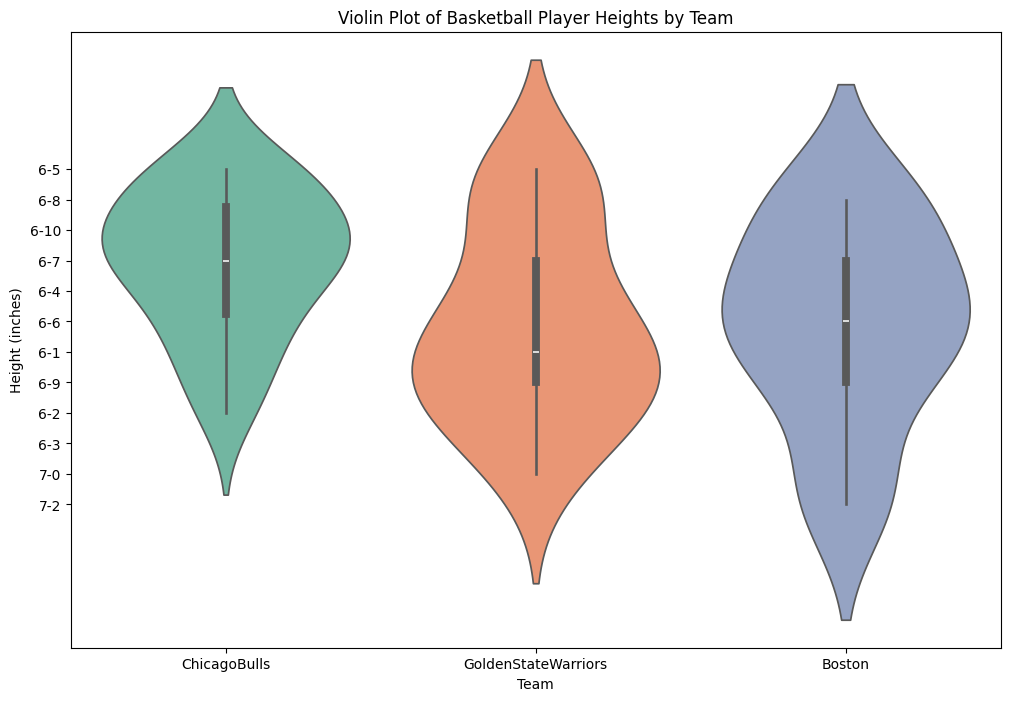

In [15]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Team', y='Ht', data=Teams, hue='Team', palette='Set2')  # Adjust 'Height' if necessary
plt.title("Violin Plot of Basketball Player Heights by Team")
plt.xlabel("Team")
plt.ylabel("Height (inches)")
plt.show()

## Network For Iranian Provinces and their Neighbors

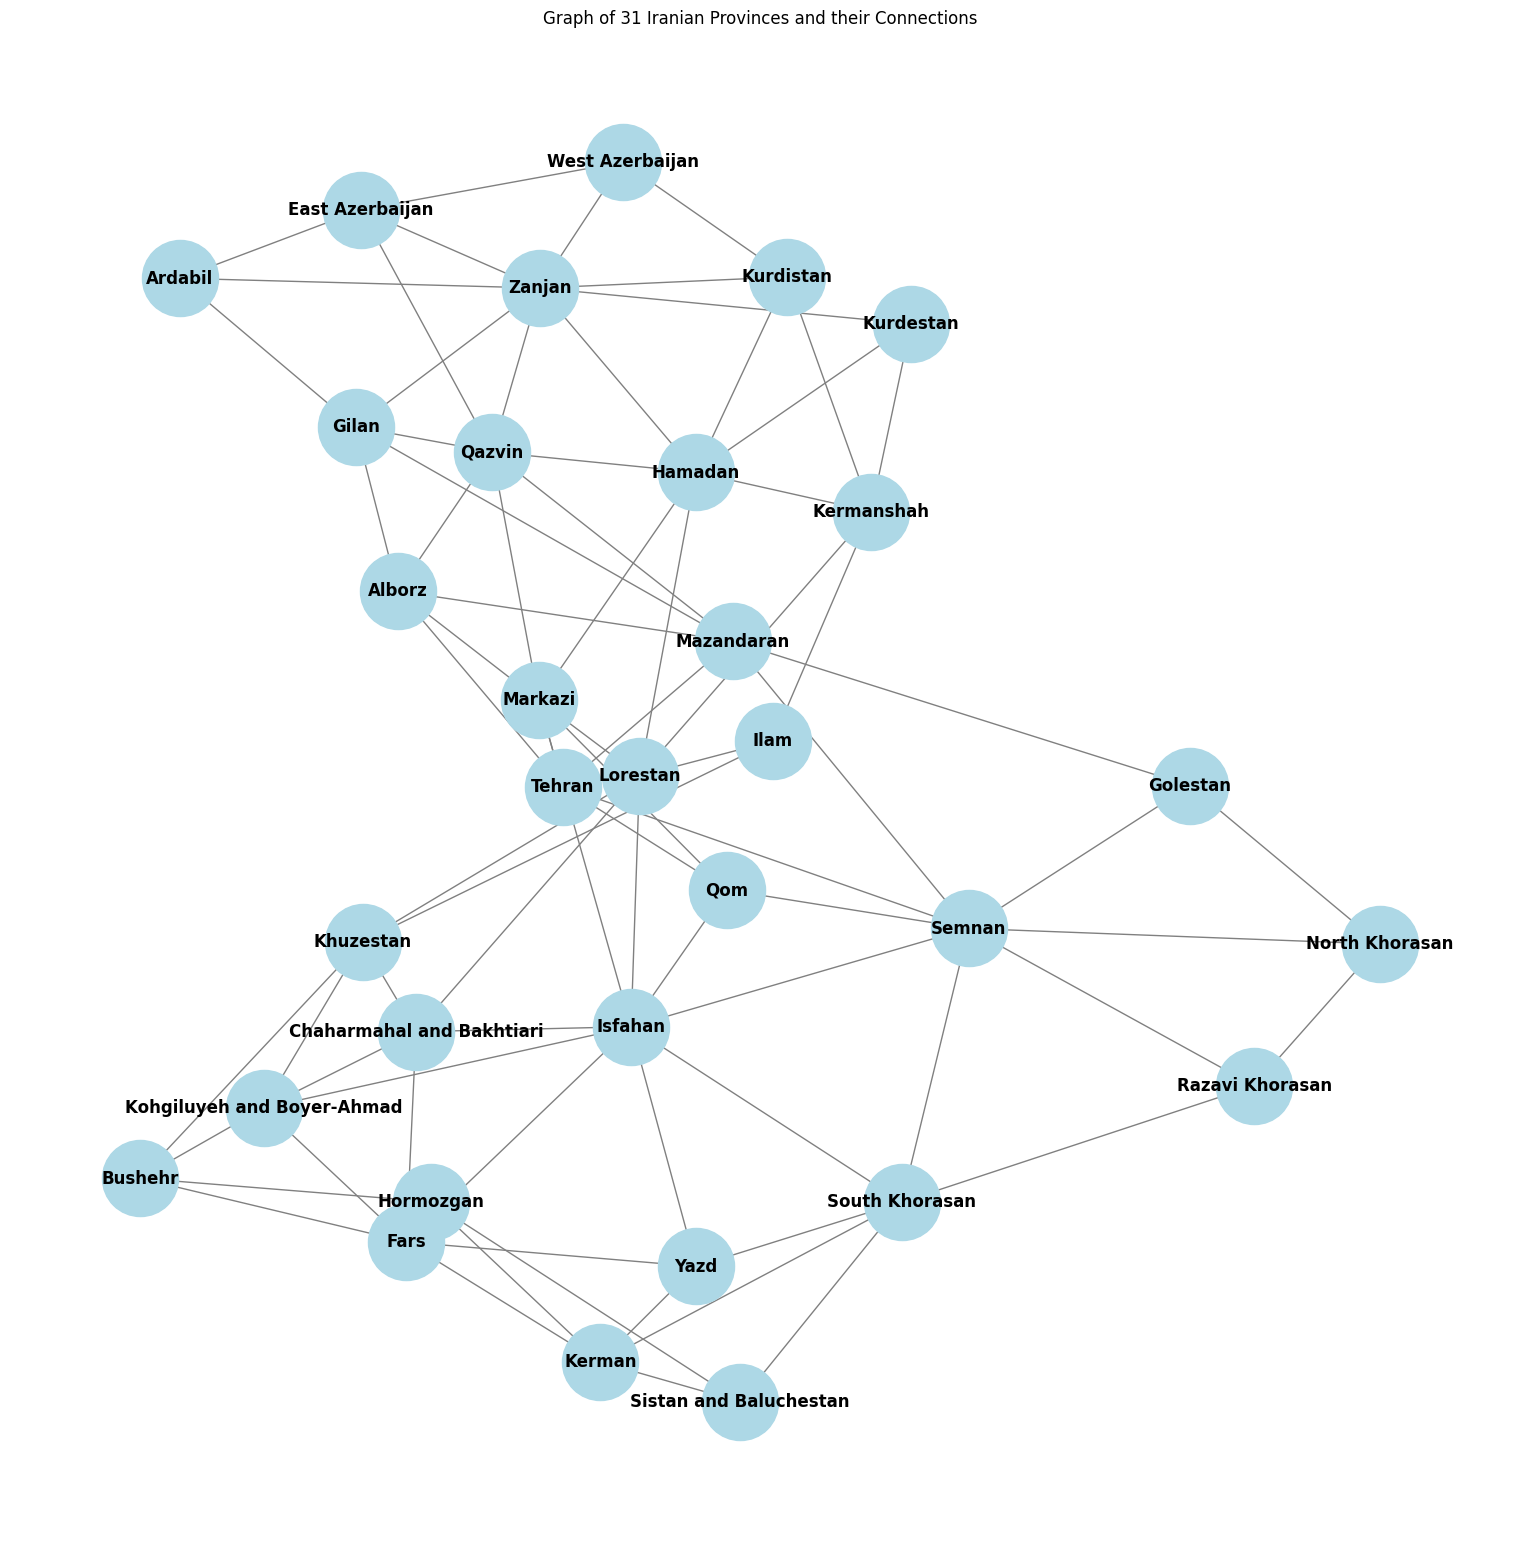

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# List of 31 provinces of Iran and their neighbors
provinces_neighbors = {
    'Alborz': ['Tehran', 'Qazvin', 'Markazi', 'Gilan'],
    'Ardabil': ['East Azerbaijan', 'Zanjan', 'Gilan'],
    'West Azerbaijan': ['East Azerbaijan', 'Kurdistan','Kurdistan'],
    'East Azerbaijan': ['West Azerbaijan', 'Ardabil', 'Zanjan'],
    'Bushehr': ['Fars', 'Kohgiluyeh and Boyer-Ahmad', 'Hormozgan','Khuzestan'],
    'Chaharmahal and Bakhtiari': ['Isfahan', 'Lorestan', 'Khuzestan', 'Kohgiluyeh and Boyer-Ahmad'],
    'Fars': ['Bushehr', 'Chaharmahal and Bakhtiari', 'Isfahan', 'Kerman', 'Hormozgan','Yazd'],
    'Gilan': ['Qazvin', 'Mazandaran', 'Ardabil', 'Zanjan'],
    'Golestan': ['Mazandaran', 'Semnan', 'North Khorasan'],
    'Hamadan': ['Kurdestan', 'Kermanshah', 'Lorestan', 'Markazi', 'Zanjan'],
    'Hormozgan': ['Bushehr', 'Fars', 'Kerman','Sistan and Baluchestan'],
    'Ilam': ['Kermanshah', 'Lorestan', 'Khuzestan'],
    'Kerman': ['Hormozgan', 'Fars', 'Yazd', 'Sistan and Baluchestan', 'South Khorasan'],
    'South Khorasan': ['Kerman', 'Sistan and Baluchestan', 'Isfahan','Semnan','Yazd','Razavi Khorasan'],
    'Razavi Khorasan': ['South Khorasan', 'Semnan', 'North Khorasan'],
    'North Khorasan': ['Golestan', 'Razavi Khorasan','Semnan'],
    'Kohgiluyeh and Boyer-Ahmad': ['Chaharmahal and Bakhtiari', 'Fars', 'Khuzestan','Isfahan','Bushehr'],
    'Kurdistan': ['West Azerbaijan', 'Kermanshah', 'Hamadan','Zanjan'],
    'Lorestan': ['Chaharmahal and Bakhtiari', 'Kermanshah', 'Ilam', 'Isfahan', 'Hamadan', 'Markazi','Khuzestan'],
    'Markazi': ['Tehran', 'Qom', 'Isfahan', 'Lorestan', 'Hamadan', 'Alborz','Qazvin'],
    'Mazandaran': ['Golestan', 'Semnan', 'Tehran','Alborz','Qazvin','Gilan'],
    'Tehran': ['Alborz', 'Markazi', 'Mazandaran', 'Semnan','Qom'],
    'Qazvin': ['Mazandaran', 'Alborz', 'Zanjan', 'East Azerbaijan','Gilan','Hamadan','Markazi'],
    'Qom': ['Tehran', 'Markazi','Isfahan','Semnan'],
    'Semnan': ['Tehran', 'Golestan', 'Qom', 'Mazandaran','Isfahan','North Khorasan','Razavi Khorasan','South Khorasan'],
    'Sistan and Baluchestan': ['Kerman', 'South Khorasan','Kerman'],
    'Zanjan': ['Kurdestan', 'East Azerbaijan', 'Qazvin', 'Gilan', 'Hamadan','West Azerbaijan','Ardabil'],
    'Kermanshah' :['Ilam','Lorestan','Hamadan','Kurdestan'],
    'Khuzestan' :['Kohgiluyeh and Boyer-Ahmad','Chaharmahal and Bakhtiari','Lorestan','Ilam','Bushehr'],
    'Isfahan' :['Kohgiluyeh and Boyer-Ahmad','Chaharmahal and Bakhtiari','Fars','Yazd','South Khorasan','Semnan','Qom','Markazi','Lorestan'],
    'Yazd' :['Isfahan', 'Fars','Kerman','South Khorasan']
}

# Create an empty graph
G = nx.Graph()

# Add nodes for each province
G.add_nodes_from(provinces_neighbors.keys())

# Add edges based on neighbors
for province, neighbors in provinces_neighbors.items():
    for neighbor in neighbors:
        G.add_edge(province, neighbor)

# Visualize the graph
plt.figure(figsize=(15, 15))

# Use spring layout for positioning
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=12, node_color='lightblue', font_weight='bold', edge_color='gray')

# Add title and display the plot
plt.title("Graph of 31 Iranian Provinces and their Connections")
plt.show()


#### Degree, Bbetweenness and Closeness Centrality

In [17]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Print centrality measures
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

Degree Centrality: {'Alborz': 0.16129032258064516, 'Ardabil': 0.0967741935483871, 'West Azerbaijan': 0.0967741935483871, 'East Azerbaijan': 0.12903225806451613, 'Bushehr': 0.12903225806451613, 'Chaharmahal and Bakhtiari': 0.16129032258064516, 'Fars': 0.22580645161290322, 'Gilan': 0.16129032258064516, 'Golestan': 0.0967741935483871, 'Hamadan': 0.22580645161290322, 'Hormozgan': 0.12903225806451613, 'Ilam': 0.0967741935483871, 'Kerman': 0.16129032258064516, 'South Khorasan': 0.1935483870967742, 'Razavi Khorasan': 0.0967741935483871, 'North Khorasan': 0.0967741935483871, 'Kohgiluyeh and Boyer-Ahmad': 0.16129032258064516, 'Kurdistan': 0.12903225806451613, 'Lorestan': 0.22580645161290322, 'Markazi': 0.22580645161290322, 'Mazandaran': 0.1935483870967742, 'Tehran': 0.16129032258064516, 'Qazvin': 0.22580645161290322, 'Qom': 0.12903225806451613, 'Semnan': 0.25806451612903225, 'Sistan and Baluchestan': 0.0967741935483871, 'Zanjan': 0.25806451612903225, 'Kermanshah': 0.16129032258064516, 'Khuzesta

#### Find the shortest path between two nodes

In [18]:
shortest_path = nx.shortest_path(G, source='Qom', target='Sistan and Baluchestan')
print("Shortest Path between node Qom and node Sistan and Baluchestan:", shortest_path)

Shortest Path between node Qom and node Sistan and Baluchestan: ['Qom', 'Isfahan', 'South Khorasan', 'Sistan and Baluchestan']


#### Shortest Path Visualization in Iran Provinces

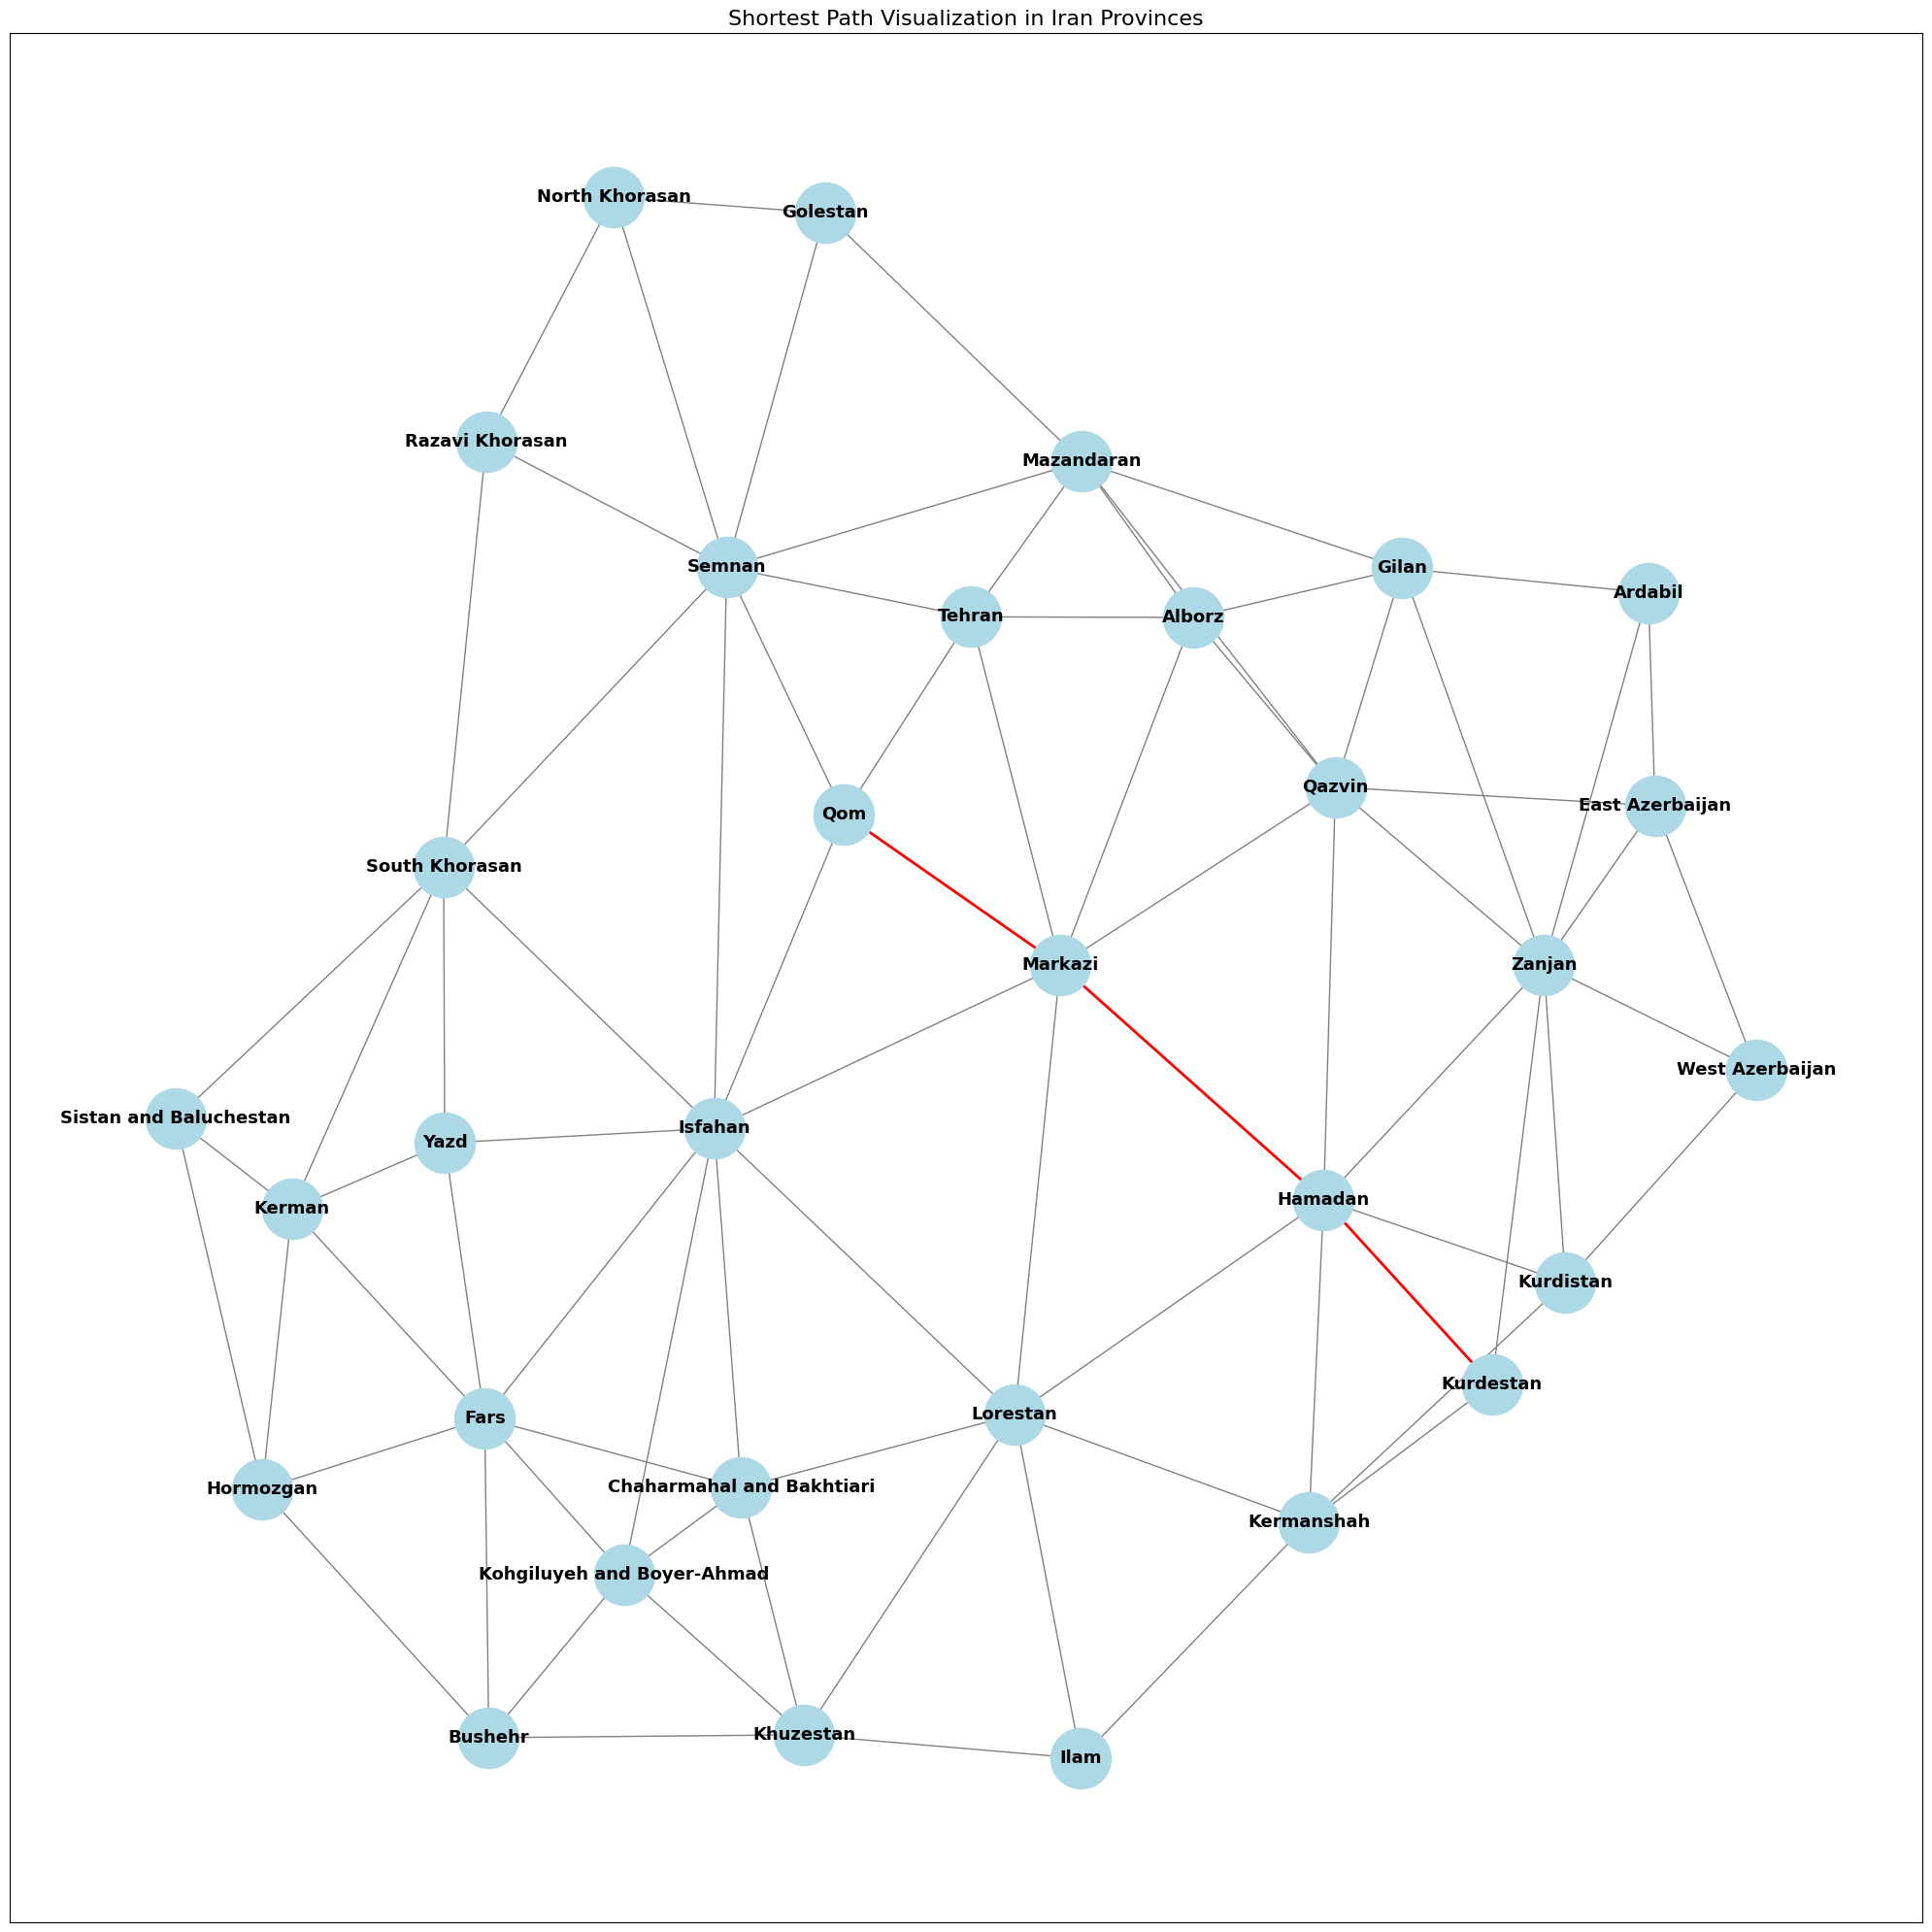

Shortest Path between node Qom and node Kurdestan: ['Qom', 'Markazi', 'Hamadan', 'Kurdestan']


In [19]:
import networkx as nx
import matplotlib.pyplot as plt

shortest_path = nx.shortest_path(G, source='Qom', target='Kurdestan')

# Define positions for nodes using spring layout
pos = nx.spring_layout(G)

# Draw the whole network
plt.figure(figsize=(20, 20))

# Draw all edges with a gray color
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1)

# Highlight the shortest path edges in red
edges_in_path = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)

# Draw all nodes with light blue color
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=13, font_weight='bold')

# Title and layout adjustment
plt.title("Shortest Path Visualization in Iran Provinces", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

# Print the shortest path
print("Shortest Path between node Qom and node Kurdestan:", shortest_path)


